In [85]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from math import sqrt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
import sklearn.preprocessing

import graphviz
from graphviz import Graph

import env
import wrangle
import os

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [75]:
# use function to pull in, clean, split, and scale zillow data
train_full, validate_full, test_full, train_scaled_full, validate_scaled_full, test_scaled_full = wrangle.wrangle_zillow()
train_full.shape, validate_full.shape, test_full.shape, train_scaled_full.shape, validate_scaled_full.shape, test_scaled_full.shape

((21988, 10), (9424, 10), (7853, 10), (21988, 10), (9424, 10), (7853, 10))

In [76]:
# review data
train_full.head()

,bathrooms,bedrooms,area,lot_area,yearbuilt,taxvalue,age,"Los Angeles, CA","Orange, CA","Ventura, CA"
29532,2.5,4,3023,6000.0,1970,119834,51,0,1,0
3604,3.0,4,1745,5977.0,1956,559188,65,0,1,0
37044,2.0,4,1950,6804.0,1968,599723,53,0,1,0
41278,3.0,4,2136,10944.0,1967,98955,54,1,0,0
6683,2.0,3,1291,6790.0,1986,122666,35,1,0,0


In [74]:
# Come back if I have more time to explore
# train = train.rename(columns={'Los Angeles, CA': 'LA', 'Orange, CA':'Orange', 'Ventura, CA':'Ventura'})
# train.head()

,bathrooms,bedrooms,area,lot_area,yearbuilt,taxvalue,age,LA,Orange,Ventura
29532,2.5,4,3023,6000.0,1970,119834,51,0,1,0
3604,3.0,4,1745,5977.0,1956,559188,65,0,1,0
37044,2.0,4,1950,6804.0,1968,599723,53,0,1,0
41278,3.0,4,2136,10944.0,1967,98955,54,1,0,0
6683,2.0,3,1291,6790.0,1986,122666,35,1,0,0


In [60]:
# Come back if I have more time to explore 
# train['location'] = numbers_series.apply(lambda n: 'even' if n % 2 == 0 else 'odd')

# np.where([train.LA == 1, 'LA').np.where(train.Orange == 1, 'Orange').np.where(train.Ventura == 1,'Ventura')
# train.head()

# def add_county_column(row):
#     if row['fips'] == 6037:
#         return 'Los Angeles'
#     elif row['fips'] == 6059:
#         return 'Orange'
#     elif row['fips'] == 6111:
#         return 'Ventura'

# zillow['County'] = zillow.apply(lambda row: add_county_column(row), axis = 1)

In [78]:
# drop columns to focus only on area, bedrooms, and bathrooms for initial exploration
train = train_full.drop(columns = ['lot_area', 'yearbuilt','age','Los Angeles, CA','Orange, CA','Ventura, CA'])
validate = validate_full.drop(columns = ['lot_area', 'yearbuilt','age','Los Angeles, CA','Orange, CA','Ventura, CA'])
test = test_full.drop(columns = ['lot_area', 'yearbuilt','age','Los Angeles, CA','Orange, CA','Ventura, CA'])
train_scaled = train_scaled_full.drop(columns = ['lot_area', 'yearbuilt','age','Los Angeles, CA','Orange, CA','Ventura, CA'])
validate_scaled = validate_scaled_full.drop(columns = ['lot_area', 'yearbuilt','age','Los Angeles, CA','Orange, CA','Ventura, CA'])
test_scaled = test_scaled_full.drop(columns = ['lot_area', 'yearbuilt','age','Los Angeles, CA','Orange, CA','Ventura, CA'])

In [79]:
train.head()

,bathrooms,bedrooms,area,taxvalue
29532,2.5,4,3023,119834
3604,3.0,4,1745,559188
37044,2.0,4,1950,599723
41278,3.0,4,2136,98955
6683,2.0,3,1291,122666


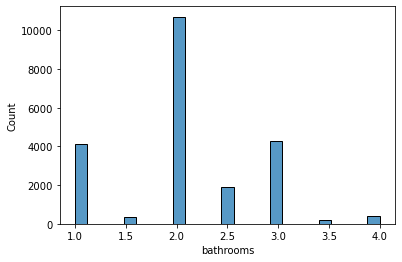

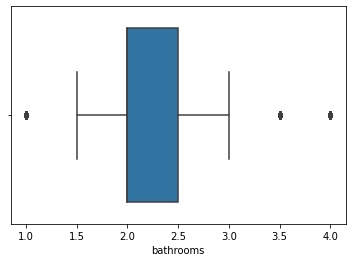

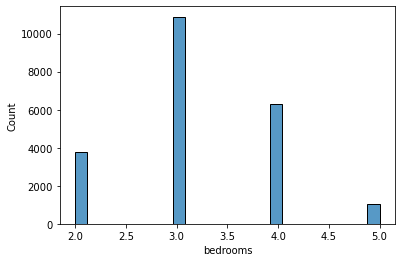

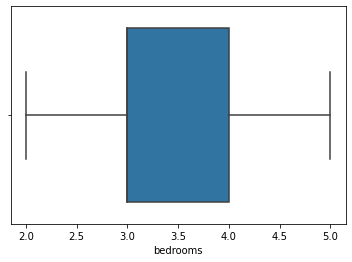

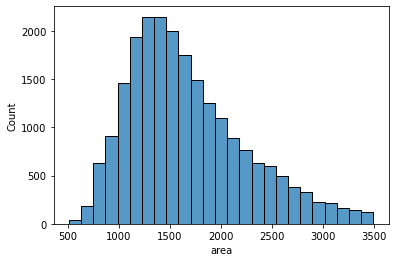

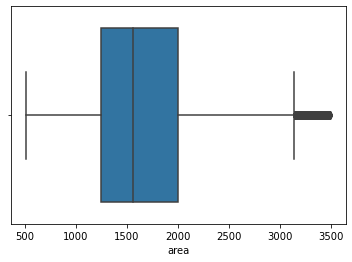

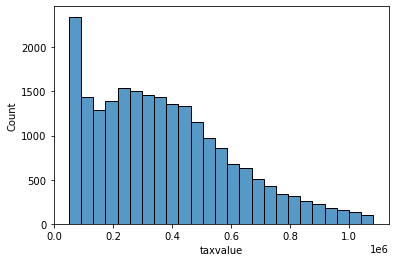

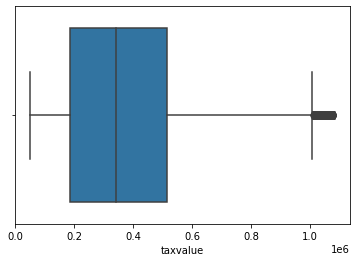

In [80]:
for col in train: 
    sns.histplot(train[col], log_scale=[False,False], bins=25)
    plt.show()
    sns.boxplot(train[col])
    plt.show()

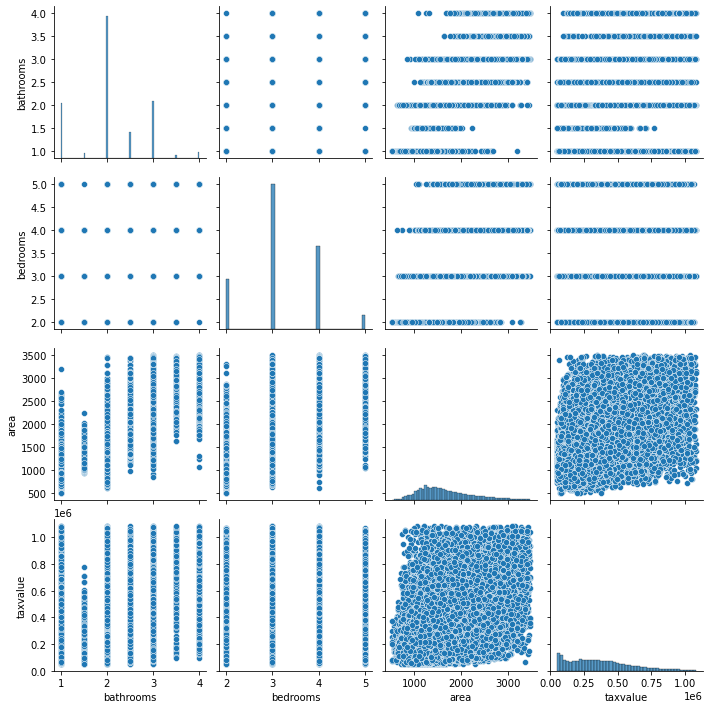

In [81]:
sns.pairplot(train)

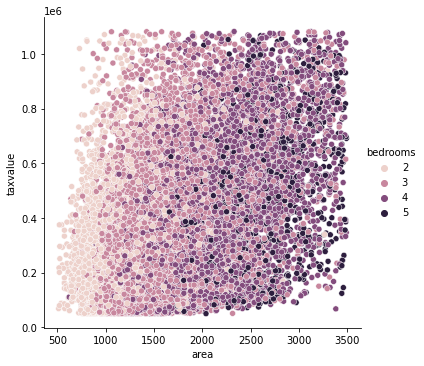

In [91]:
sns.relplot(x='area', y='taxvalue', data=train, kind='scatter', hue='bedrooms')

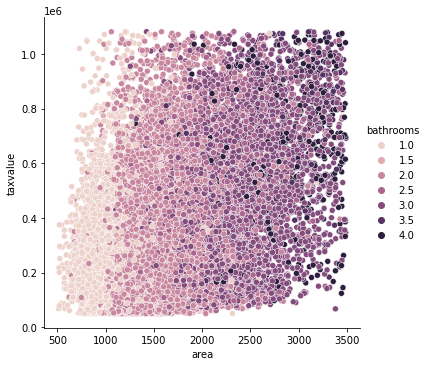

In [92]:
sns.relplot(x='area', y='taxvalue', data=train, kind='scatter', hue='bathrooms')

<AxesSubplot:>

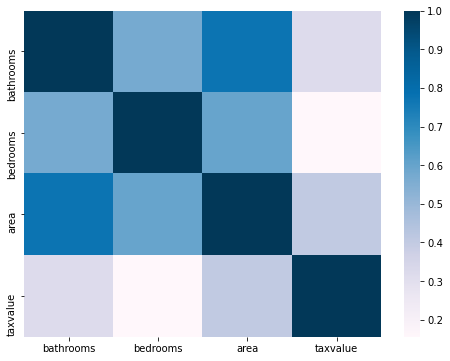

In [118]:
plt.figure(figsize=(8, 6))
cmap = sns.cubehelix_palette()
sns.heatmap(train.corr(), cmap='PuBu')

In [119]:
sns.distplot(train.taxvalue,bins=100,kde=False, hue=train.bedrooms)

TypeError: distplot() got an unexpected keyword argument 'hue'